In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

#  Генератор случайных чисел для равномерного распределения на [0,1]

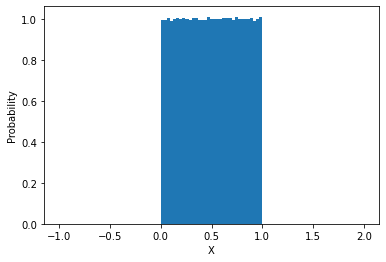

In [2]:
uniform = np.random.uniform(size=1_000_000)

bins = np.linspace(-1, 2, 100)

plt.hist(uniform, bins, density=True)
plt.ylabel('Probability')
plt.xlabel('X');

# Генератор случайных чисел для закона распределения, заданного непрерывной функцией распределения

In [3]:
from scipy.optimize import newton

# Inversion method (https://web.mit.edu/urban_or_book/www/book/chapter7/7.1.3.html)
def generate_from_distribution(f_distr, size):
    
    # генерируем ряд значений [0,1]
    values = np.random.uniform(size=size)
    
    # для каждого значения T численно ищем точку x, в которой значение функции
    # распределения совпадает с значением Т 
    return [newton(lambda x: f_distr(x) - value, value, tol = 1e-5, maxiter=100) for value in values]

#### Нормальное распределение

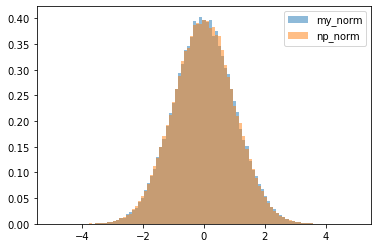

In [4]:
from scipy.stats import norm

size = 100_000

my_norm = generate_from_distribution(norm.cdf, size)
np_norm = np.random.normal(size=size)

bins = np.linspace(-5, 5, 100)

plt.hist(my_norm, bins, alpha=0.5, density=True, label='my_norm')
plt.hist(np_norm, bins, alpha=0.5, density=True, label='np_norm')
plt.legend(loc='upper right')
plt.show()

#### Показательное распределение

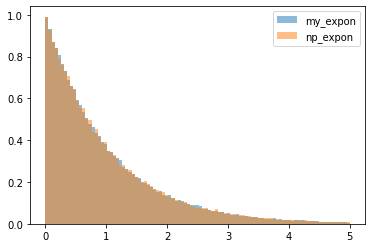

In [5]:
from scipy.stats import expon

size = 100_000

my_expon = generate_from_distribution(expon.cdf, size)
np_expon = np.random.exponential(size=size)

bins = np.linspace(0, 5, 100)

plt.hist(my_expon, bins, alpha=0.5, density=True, label='my_expon')
plt.hist(np_expon, bins, alpha=0.5, density=True, label='np_expon')
plt.legend(loc='upper right')
plt.show()

#### Гамма-распределение

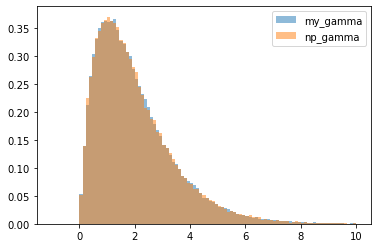

In [7]:
from scipy.stats import gamma

size = 100_000
shape = 2.0

my_gamma = generate_from_distribution(lambda x: gamma.cdf(x, shape), size)
np_gamma = np.random.gamma(shape, size=size)

bins = np.linspace(-1, 10, 100)

plt.hist(my_gamma, bins, alpha=0.5, density=True, label='my_gamma')
plt.hist(np_gamma, bins, alpha=0.5, density=True, label='np_gamma')
plt.legend(loc='upper right')
plt.show()


#### Распределение Стьюдента

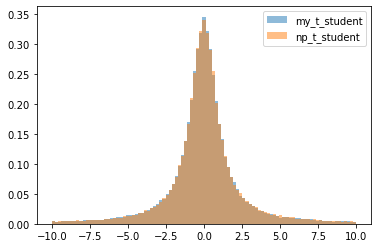

In [10]:
from scipy.stats import t

size = 100_000
df = 1.0

my_t_student = generate_from_distribution(lambda x: t.cdf(x, df), size)
np_t_student = np.random.standard_t(df, size=size)

bins = np.linspace(-10, 10, 100)

plt.hist(my_t_student, bins, alpha=0.5, density=True, label='my_t_student')
plt.hist(np_t_student, bins, alpha=0.5, density=True, label='np_t_student')
plt.legend(loc='upper right')
plt.show()

# Генератор случайных чисел для дискретного распределения с конечным числом значений

#### Биномиальное распределение

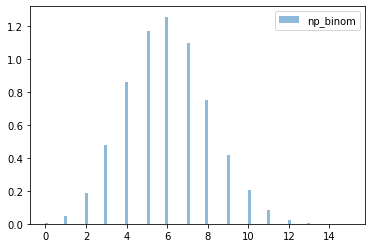

In [21]:
size = 100_000
n = 20
p = 0.3

np_binom = np.random.binomial(n, p, size=size)

bins = np.linspace(0, 15, 100)

plt.hist(np_binom, bins, alpha=0.5, density=True, label='np_binom')
plt.legend(loc='upper right')
plt.show()

#### Распределение Бернулли

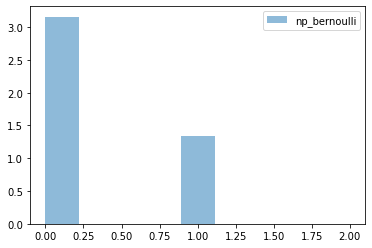

In [29]:
size = 100_000
p = 0.3

np_bernoulli = np.random.binomial(1, p, size=size)

bins = np.linspace(0, 2, 10)

plt.hist(np_bernoulli, bins, alpha=0.5, density=True, label='np_bernoulli')
plt.legend(loc='upper right')
plt.show()

# Генератор случайных чисел для дискретного распределения со счетным числом значений

#### Пуассоновское распределение

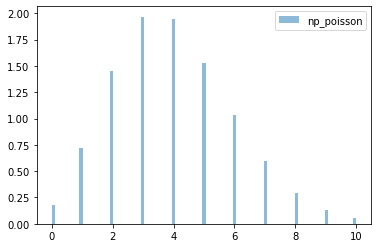

In [35]:
size = 100_000
lam = 4

np_poisson = np.random.poisson(lam, size=size)

bins = np.linspace(0, 10, 100)

plt.hist(np_poisson, bins, alpha=0.5, density=True, label='np_poisson')
plt.legend(loc='upper right')
plt.show()

#### Геометрическое распределение

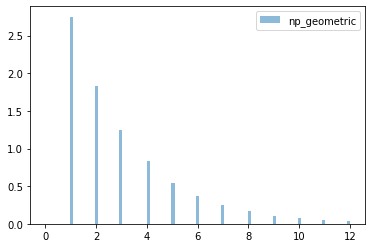

In [38]:
size = 100_000
p = 0.33

np_geometric = np.random.geometric(p, size=size)

bins = np.linspace(0, 12, 100)

plt.hist(np_geometric, bins, alpha=0.5, density=True, label='np_geometric')
plt.legend(loc='upper right')
plt.show()